# Feature Selection Advanced House Price Prediction

The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# Feature Selection and Choosing the best performing ML algorithms

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

### Read given data and transformed data

In [2]:
train_data = pd.read_csv('train.csv')
dataset=pd.read_csv('X_train.csv')
target = 'SalePrice'

In [3]:
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1,12.247694,0.235294,0.666667,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.6875,0.666667,1.0,0.75,1.0,0.666667,0.500,0.949275,0.883333,0.0,0.0,1.000000,1.000000,0.666667,0.12250,0.666667,1.0,1.000000,0.75,0.75,0.25,1.000000,0.125089,0.8,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.345385,0.413559,0.0,0.577712,0.333333,0.0,0.50,0.5,0.375,0.333333,0.50,0.461538,1.0,0.00,0.0,0.75,0.346154,0.666667,0.4,0.368280,0.666667,1.0,1.0,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.666667,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.4375,0.333333,1.0,0.75,0.6,0.555556,0.875,0.753623,0.433333,0.0,0.0,0.285714,0.142857,0.000000,0.00000,0.333333,1.0,0.666667,0.75,0.75,1.00,0.666667,0.173281,0.8,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.487844,0.000000,0.0,0.470245,0.000000,0.5,0.50,0.0,0.375,0.333333,0.25,0.307692,1.0,0.25,0.5,0.75,0.259615,0.666667,0.4,0.309140,0.666667,1.0,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.666667,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.6875,0.666667,1.0,0.75,1.0,0.666667,0.500,0.934783,0.866667,0.0,0.0,1.000000,1.000000,0.666667,0.10125,0.666667,1.0,1.000000,0.75,0.75,0.50,1.000000,0.086109,0.8,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.371846,0.419370,0.0,0.593095,0.333333,0.0,0.50,0.5,0.375,0.333333,0.50,0.307692,1.0,0.25,0.5,0.75,0.339744,0.666667,0.4,0.408602,0.666667,1.0,1.0,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.666667,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.7500,0.666667,1.0,0.75,1.0,0.666667,0.500,0.311594,0.333333,0.0,0.0,0.142857,0.428571,0.000000,0.00000,0.333333,1.0,0.333333,0.50,1.00,0.25,0.666667,0.038271,0.8,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.387847,0.366102,0.0,0.579157,0.333333,0.0,0.25,0.0,0.375,0.333333,0.50,0.384615,1.0,0.25,1.0,0.25,0.330128,0.333333,0.6,0.431452,0.666667,1.0,1.0,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.666667,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.0000,0.666667,1.0,0.75,1.0,0.777778,0.500,0.927536,0.833333,0.0,0.0,1.000000,1.000000,0.666667,0.21875,0.666667,1.0,1.000000,0.75,0.75,0.75,1.000000,0.116052,0.8,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.452138,0.509927,0.0,0.666523,0.333333,0.0,0.50,0.5,0.500,0.333333,0.50,0.538462,1.0,0.25,0.5,0.75,0.336538,0.666667,0.6,0.561828,0.666667,1.0,1.0,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dataset.shape, train_data.shape

((2919, 92), (1460, 81))

In [5]:
## Run if want to use the target(SalePrice) as original else it is now in log()

# y=train_data[[target]]
# dataset[target] = y[target]

In [6]:
# Take a copy of dataset to data then do your work on data

data = dataset.copy()
test_data = data.iloc[len(train_data):]
data = data.iloc[:len(train_data)]
test_data.drop(target, axis=1, inplace=True)
data.drop('Id', axis=1, inplace=True)

# now data and test_data consists of data with label(to train and CV model) and without-label(its prediction need to be submitted at Kaggle) respectively

In [7]:
data.shape, train_data.shape, test_data.shape

((1460, 91), (1460, 81), (1459, 91))

In [8]:
# data.columns, test_data.columns

### splitting X and y to train and CV

In [9]:
X = data.drop(target, axis=1)
y = data[target]

### Apply Feature Selection

In [10]:


# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.0003, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)


SelectFromModel(estimator=Lasso(alpha=0.0003, random_state=0))

In [11]:
feature_sel_model.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
        True, False, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False])

In [12]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 90
selected features: 61
features with coefficients shrank to zero: 29


In [13]:
selected_feat

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'PoolQC',
       'Fence', 'MoSold', 'YrSold', 'SaleCondition', 'LotFrontagenan',
       'GarageYrBltnan'],
      dtype='object')

In [14]:
selected_feat = list(selected_feat)
data = pd.merge(X[selected_feat], y, left_index=True, right_index=True)
test_data = test_data[['Id']+selected_feat]

In [15]:
X.shape, y.shape, train_data.shape, test_data.shape, data.shape

((1460, 90), (1460,), (1460, 81), (1459, 62), (1460, 62))

In [16]:
### Use this at Kaggle Kernal
# import datetime as dt
# start = dt.datetime.now()

# #Your algorithm

# stop = dt.datetime.now()
# execution_time = stop-start
# print("\n"+"Execution time: " + str (execution_time)+"\n")

### Train different models and find the best models

Dataset size: (1460, 62)
N features: 61
--------------------------------------------------
Linear Regression:
Mean Squared Error    : 0.0169514891090655
Mean Absolute Error   : 0.0923076123909072
R^2 Score             : 0.9091625876398334
Train R^2 Score       : 0.9065044025483746
Best Model            : LinearRegression()
N features            : 61
--------------------------------------------------
Ridge:
Mean Squared Error    : 0.016830779785084505
Mean Absolute Error   : 0.09192281236345318
R^2 Score             : 0.9098094289036085
Train R^2 Score       : 0.9056884019189599
Best Model            : Ridge(alpha=1)
N features            : 61
--------------------------------------------------
Lasso:
Mean Squared Error    : 0.0424412153906242
Mean Absolute Error   : 0.14833930628344508
R^2 Score             : 0.7725715918701781
Train R^2 Score       : 0.7776912422771639
Best Model            : Lasso(alpha=0.01)
N features            : 61
-------------------------------------------------

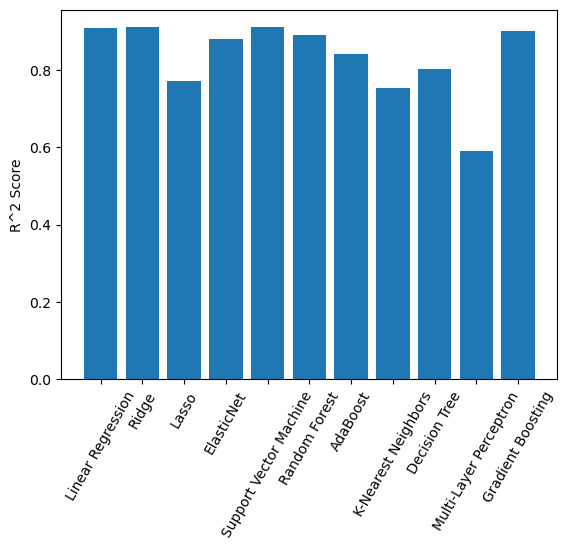

In [17]:
### Train different models find the best models

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")


# ==================================================================
file = 'your_dataset.csv'
target = 'SalePrice'
dataset = data
# ==================================================================

# Load the preprocessed dataset
# dataset = pd.read_csv(file)

# Split the dataset into features and target variable
X = dataset.drop(target, axis=1)
y = dataset[target]

# Split the dataset into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Define a list of regressors with their respective hyperparameter grids for tuning
regressors = [
    ('Linear Regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {
        'alpha': [0.01, 0.1, 1, 10]
    }),
    ('Lasso', Lasso(), {
        'alpha': [0.01, 0.1, 1, 10]
    }),
    ('ElasticNet', ElasticNet(), {
        'alpha': [0.01, 0.1, 1, 10],
        'l1_ratio': [0.25, 0.5, 0.75]
    }),
    ('Support Vector Machine', SVR(), {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
    }),
    ('Random Forest', RandomForestRegressor(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
    }),
    ('AdaBoost', AdaBoostRegressor(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001],
    }),
    ('K-Nearest Neighbors', KNeighborsRegressor(), {
        'n_neighbors': [3, 5, 7],
    }),
    ('ElasticNet', ElasticNet(), {
        'alpha': [0.01, 0.1, 1, 10],
        'l1_ratio': [0.1, 0.5, 0.9],
        'max_iter': [1000, 5000, 10000],
        'tol': [1e-3, 1e-4, 1e-5]
    }),
    ('Decision Tree', DecisionTreeRegressor(), {
        'max_depth': [None, 5, 10],
    }),
    ('Multi-Layer Perceptron', MLPRegressor(), {
        'hidden_layer_sizes': [(100,), (50, 50)],
        'activation': ['relu', 'logistic'],
        'alpha': [0.0001, 0.001, 0.01],
    }),
    ('Gradient Boosting', GradientBoostingRegressor(), {
        'learning_rate': [0.1, 0.01, 0.001],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10],
    }),
    # ====================================================================================
    # ('Ridge', Ridge(), {
    #     'alpha': [0.01, 0.1, 1.0, 10.0],
    #     'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag'],
    #     'max_iter': [1000, 5000, 10000]
    # }),
    # ('Gradient Boosting', GradientBoostingRegressor(), {
    #     'learning_rate': [0.1, 0.01, 0.001],
    #     'n_estimators': [50, 100, 200],
    #     'max_depth': [3, 5, 10],
    #     'subsample': [0.8, 0.9, 1.0],
    #     'min_samples_split': [2, 5, 10],
    #     'min_samples_leaf': [1, 2, 4],
    #     'max_features': ['auto', 'sqrt', 'log2'],
    #     # 'loss': ['quantile', 'huber']
    # }),
    # ('Support Vector Machine', SVR(), {
    #     'C': [0.01, 0.1, 1.0, 10.0],
    #     'kernel': ['linear', 'rbf', 'poly'],
    #     'degree': [2, 3],
    #     'gamma': ['scale', 'auto'],
    #     'epsilon': [0.1, 0.01, 0.001]
    # }),
]

# Train and evaluate each regressor with hyperparameter tuning
results = {}
for name, regressor, param_grid in regressors:
    # Perform grid search
    grid_search = GridSearchCV(regressor, param_grid, cv=5)
    # grid_search = RandomizedSearchCV(regressor, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model from the grid search
    best_model = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test_scaled)
    train_y_pred = best_model.predict(X_train_scaled)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    train_r2 = r2_score(y_train, train_y_pred)
    
    # Store the results
    results[name] = {'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R^2 Score': r2, 'Train R^2 Score': train_r2, 'Best Model': best_model, 'N features': len(selected_feat)}


print('Dataset size:', dataset.shape)
print('N features:', dataset.shape[1]-1)
# Print the results
for name, metrics in results.items():
    print('--------------------------------------------------')
    print(f'{name}:')
    for metric, value in metrics.items():
        print(f'{str(metric).ljust(22)}: {value}')
print('--------------------------------------------------')
    

# Select the best model based on a chosen metric (e.g., highest R^2 Score
print('\n==================================================')
best_model = max(map(lambda x:(results[x]['R^2 Score'], x), results))[1]
model = results[best_model]['Best Model']
print('Best Model is:',best_model)
for metric, value in results[best_model].items():
    print(f'{str(metric).ljust(22)}: {value}')
print('==================================================\n')

plt.xticks(rotation=60)
plt.bar(x=list(results.keys()), height=list(map(lambda x: results[x]['R^2 Score'], results.keys())))
plt.ylabel('R^2 Score')
plt.show()

In [18]:
stopppppp

NameError: name 'stopppppp' is not defined

### SAVE CURRENT MARTICES

Dataset size: (1460, 62)
N features: 61
--------------------------------------------------
Linear Regression:
Mean Squared Error    : 0.0169514891090655
Mean Absolute Error   : 0.0923076123909072
R^2 Score             : 0.9091625876398334
Train R^2 Score       : 0.9065044025483746
Best Model            : LinearRegression()
N features            : 61
--------------------------------------------------
Ridge:
Mean Squared Error    : 0.016830779785084505
Mean Absolute Error   : 0.09192281236345318
R^2 Score             : 0.9098094289036085
Train R^2 Score       : 0.9056884019189599
Best Model            : Ridge(alpha=1)
N features            : 61
--------------------------------------------------
Lasso:
Mean Squared Error    : 0.0424412153906242
Mean Absolute Error   : 0.14833930628344508
R^2 Score             : 0.7725715918701781
Train R^2 Score       : 0.7776912422771639
Best Model            : Lasso(alpha=0.01)
N features            : 61
-------------------------------------------------

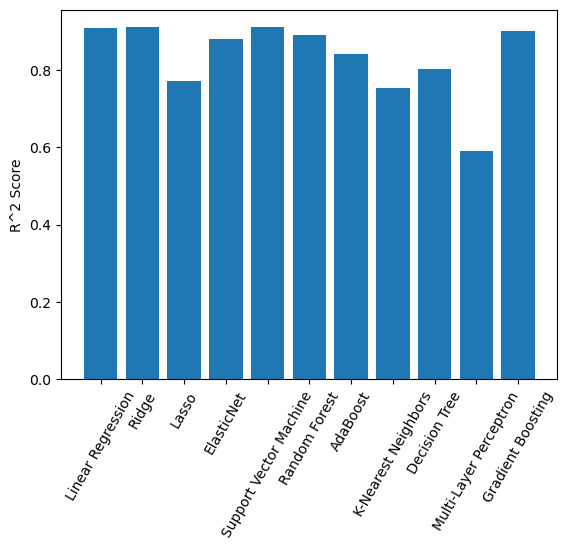

In [19]:
# RUN TO SAVE CURRENT MARTICES

print('Dataset size:', dataset.shape)
print('N features:', dataset.shape[1]-1)
# Print the results
for name, metrics in results.items():
    print('--------------------------------------------------')
    print(f'{name}:')
    for metric, value in metrics.items():
        print(f'{str(metric).ljust(22)}: {value}')
print('--------------------------------------------------')
    

# Select the best model based on a chosen metric (e.g., highest R^2 Score
print('\n==================================================')
best_model = max(map(lambda x:(results[x]['R^2 Score'], x), results))[1]
model = results[best_model]['Best Model']
print('Best Model is:',best_model)
for metric, value in results[best_model].items():
    print(f'{str(metric).ljust(22)}: {value}')
print('==================================================\n')

plt.xticks(rotation=60)
plt.bar(x=list(results.keys()), height=list(map(lambda x: results[x]['R^2 Score'], results.keys())))
plt.ylabel('R^2 Score')
plt.show()

### Train with the best model and save predivctions to submission.csv

In [ ]:
# SAVING Predictions of test_data(test.csv) to submission.csv

model.fit(X, y)
y_ = model.predict(test_data.drop('Id', axis=1))
output = pd.DataFrame({'Id': test_data.Id, target: np.exp(y_)})
output.to_csv('submission.csv', index=False)
print("Submission successfully saved!")

Submission successfully saved!


# Training the best models with data with different no. of features

### Trainging and saving all matrices



##########################################################################################
N features: 61
total features: 90
selected features: 61
features with coefficients shrank to zero: 29
Dataset size: (1460, 62)
--------------------------------------------------
Linear Regression:
Mean Squared Error    : 0.0169514891090655
Mean Absolute Error   : 0.0923076123909072
R^2 Score             : 0.9091625876398334
Train R^2 Score       : 0.9065044025483746
Best Model            : LinearRegression()
N features            : 61
--------------------------------------------------
Ridge:
Mean Squared Error    : 0.016830779785084505
Mean Absolute Error   : 0.09192281236345318
R^2 Score             : 0.9098094289036085
Train R^2 Score       : 0.9056884019189599
Best Model            : Ridge(alpha=1)
N features            : 61
--------------------------------------------------
ElasticNet:
Mean Squared Error    : 0.02592151513316883
Mean Absolute Error   : 0.11256191884982358
R^2 Score         

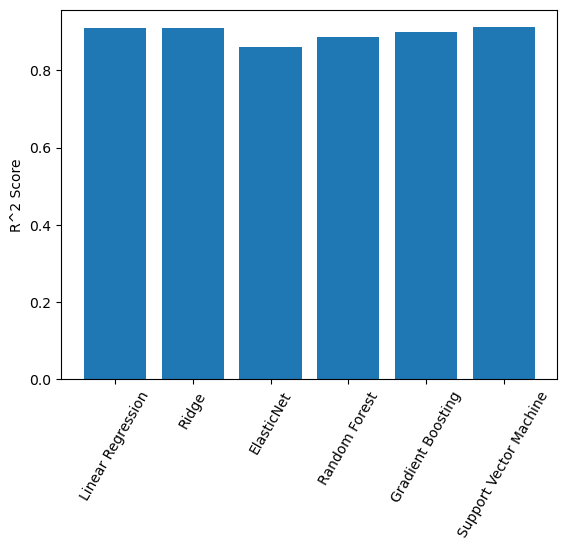



##########################################################################################
N features: 65
total features: 90
selected features: 65
features with coefficients shrank to zero: 25
Dataset size: (1460, 66)
--------------------------------------------------
Linear Regression:
Mean Squared Error    : 0.016988067796703938
Mean Absolute Error   : 0.09213442625607926
R^2 Score             : 0.9089665745750679
Train R^2 Score       : 0.9066406239355868
Best Model            : LinearRegression()
N features            : 65
--------------------------------------------------
Ridge:
Mean Squared Error    : 0.016791892586412605
Mean Absolute Error   : 0.09154357086240925
R^2 Score             : 0.9100178125139547
Train R^2 Score       : 0.9057784190282201
Best Model            : Ridge(alpha=1)
N features            : 65
--------------------------------------------------
ElasticNet:
Mean Squared Error    : 0.026125629497366718
Mean Absolute Error   : 0.11332430306330488
R^2 Score     

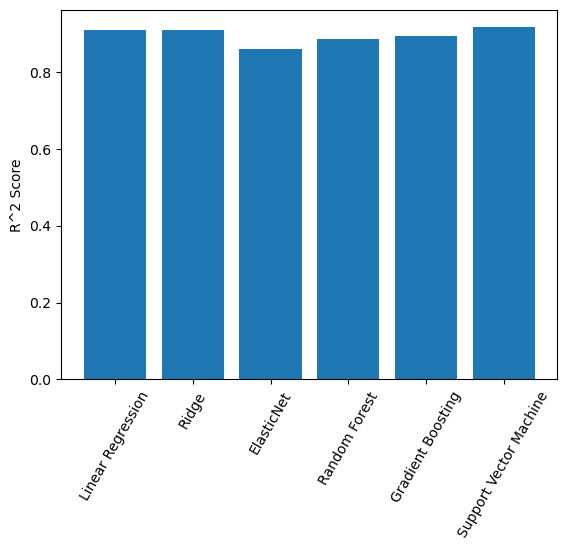



##########################################################################################
N features: 71
total features: 90
selected features: 71
features with coefficients shrank to zero: 19
Dataset size: (1460, 72)
--------------------------------------------------
Linear Regression:
Mean Squared Error    : 0.01719255042543614
Mean Absolute Error   : 0.09280737505002518
R^2 Score             : 0.9078708199338603
Train R^2 Score       : 0.9079675376426923
Best Model            : LinearRegression()
N features            : 71
--------------------------------------------------
Ridge:
Mean Squared Error    : 0.016990884135820634
Mean Absolute Error   : 0.09229906594273798
R^2 Score             : 0.9089514827470849
Train R^2 Score       : 0.9067962545953343
Best Model            : Ridge(alpha=1)
N features            : 71
--------------------------------------------------
ElasticNet:
Mean Squared Error    : 0.02604413183340346
Mean Absolute Error   : 0.11298905496264909
R^2 Score       

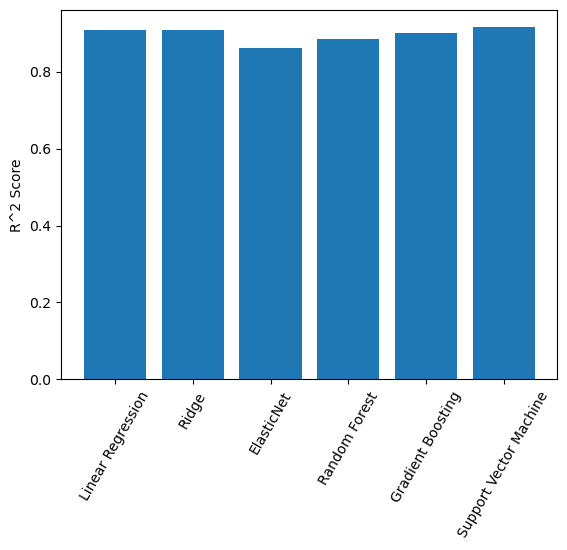

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")




# =========================
kaggledir = '/kaggle/input/housepricedata/'
train_data = pd.read_csv('train.csv')
datasetsaved=pd.read_csv('X_train.csv')
target = 'SalePrice'

# y=train_data[[target]]
# dataset[target] = y[target]

# X=dataset.drop(['Id','SalePrice'],axis=1)



# ==================================================================
bestresult_for_alpha = []
# for alpha in [0.005, 0.004, 0.003, 0.001, 0.0004, 0.0003, 0.0002, 0.0001, 0.000009]:
for alpha in [0.0003, 0.0002, 0.0001]:
    # alpha = i*0.0001
    data = datasetsaved.copy()
    test_data = data.iloc[len(train_data):]
    data = data.iloc[:len(train_data)]
    test_data.drop(target, axis=1, inplace=True)
    data.drop('Id', axis=1, inplace=True)

    X = data.drop(target, axis=1)
    y = data[target]
    feature_sel_model = SelectFromModel(Lasso(alpha=alpha, random_state=0)) # remember to set the seed, the random state in this function
    feature_sel_model.fit(X, y)
    # feature_sel_model.get_support()
    selected_feat = X.columns[(feature_sel_model.get_support())]


    # let's print some stats
    print('\n\n##########################################################################################')
    print('N features: {}'.format(len(selected_feat)))
    print('total features: {}'.format((X.shape[1])))
    print('selected features: {}'.format(len(selected_feat)))
    print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))
    selected_feat = list(selected_feat)
    data = pd.merge(X[selected_feat], y, left_index=True, right_index=True)
    test_data = test_data[['Id']+selected_feat]

    file = 'your_dataset.csv'
    target = 'SalePrice'
    dataset = data
    # ==================================================================


    # Load the preprocessed dataset
    # dataset = pd.read_csv(file)

    # Split the dataset into features and target variable
    X = dataset.drop(target, axis=1)
    y = dataset[target]

    # Split the dataset into training and testing sets
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # scaler = StandardScaler()
    # X_train_scaled = scaler.fit_transform(X_train)
    # X_test_scaled = scaler.transform(X_test)

    # Define a list of regressors with their respective hyperparameter grids for tuning
    regressors = [
        ('Linear Regression', LinearRegression(), {}),
        ('Ridge', Ridge(), {
            'alpha': [0.01, 0.1, 1, 10]
        }),
        # ('Lasso', Lasso(), {
        #     'alpha': [0.01, 0.1, 1, 10]
        # }),
        ('ElasticNet', ElasticNet(), {
            'alpha': [0.01, 0.1, 1, 10],
            'l1_ratio': [0.25, 0.5, 0.75]
        }),
        # ('Support Vector Machine', SVR(), {
        #     'C': [0.01, 0.1, 1, 10],
        #     'kernel': ['linear', 'rbf'],
        # }),
        ('Random Forest', RandomForestRegressor(), {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10],
        }),
        # ('AdaBoost', AdaBoostRegressor(), {
        #     'n_estimators': [50, 100, 200],
        #     'learning_rate': [0.1, 0.01, 0.001],
        # }),
        # ('K-Nearest Neighbors', KNeighborsRegressor(), {
        #     'n_neighbors': [3, 5, 7],
        # }),
        # ('Decision Tree', DecisionTreeRegressor(), {
        #     'max_depth': [None, 5, 10],
        # }),
        # ('Multi-Layer Perceptron', MLPRegressor(), {
        #     'hidden_layer_sizes': [(100,), (50, 50)],
        #     'activation': ['relu', 'logistic'],
        #     'alpha': [0.0001, 0.001, 0.01],
        # }),
        ('Gradient Boosting', GradientBoostingRegressor(), {
            'learning_rate': [0.1, 0.01, 0.001],
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 10],
        }),
        # ====================================================================================
        # ('Ridge', Ridge(), {
        #     'alpha': [0.01, 0.1, 1.0, 10.0],
        #     'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag'],
        #     'max_iter': [1000, 5000, 10000]
        # }),
        # ('ElasticNet', ElasticNet(), {
        #     'alpha': [0.01, 0.1, 1, 10],
        #     'l1_ratio': [0.1, 0.5, 0.9],
        #     'max_iter': [1000, 5000, 10000],
        #     'tol': [1e-3, 1e-4, 1e-5]
        # }),
        # ('Gradient Boosting', GradientBoostingRegressor(), {
        #     'learning_rate': [0.1, 0.01, 0.001],
        #     'n_estimators': [50, 100, 200],
        #     'max_depth': [3, 5, 10],
        #     'subsample': [0.8, 0.9, 1.0],
        #     'min_samples_split': [2, 5, 10],
        #     'min_samples_leaf': [1, 2, 4],
        #     'max_features': ['auto', 'sqrt', 'log2'],
        #     # 'loss': ['quantile', 'huber']
        # }),
        ('Support Vector Machine', SVR(), {
            'C': [0.01, 0.1, 1.0, 10.0],
            'kernel': ['linear', 'rbf', 'poly'],
            'degree': [2, 3],
            'gamma': ['scale', 'auto'],
            'epsilon': [0.1, 0.01, 0.001]
        }),
    ]

    # Train and evaluate each regressor with hyperparameter tuning
    results = {}
    for name, regressor, param_grid in regressors:
        # Perform grid search
        grid_search = GridSearchCV(regressor, param_grid, cv=5)
    #     grid_search = RandomizedSearchCV(regressor, param_grid, cv=5)
        grid_search.fit(X_train_scaled, y_train)
        
        # Get the best model from the grid search
        best_model = grid_search.best_estimator_
        
        # Make predictions on the test set
        y_pred = best_model.predict(X_test_scaled)
        train_y_pred = best_model.predict(X_train_scaled)
        
        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        train_r2 = r2_score(y_train, train_y_pred)
        
        # Store the results
        # results[name] = {'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R^2 Score': r2, 'Train R^2 Score': train_r2, 'Best Model': best_model}
        results[name] = {'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R^2 Score': r2, 'Train R^2 Score': train_r2, 'Best Model': best_model, 'N features': len(selected_feat)}


    print('Dataset size:', dataset.shape)
    # Print the results
    for name, metrics in results.items():
        print('--------------------------------------------------')
        print(f'{name}:')
        for metric, value in metrics.items():
            print(f'{str(metric).ljust(22)}: {value}')
    print('--------------------------------------------------')
        

    # Select the best model based on a chosen metric (e.g., highest R^2 Score
    print('\n==================================================')
    best_model = max(map(lambda x:(results[x]['R^2 Score'], x), results))[1]
    model = results[best_model]['Best Model']
    print('Best Model is:',best_model)
    for metric, value in results[best_model].items():
        print(f'{str(metric).ljust(22)}: {value}')
    print('==================================================\n')
    bestresult_for_alpha.append((best_model, model, results[best_model]['R^2 Score'], alpha, len(selected_feat)))
    
    plt.close()
    plt.xticks(rotation=60)
    plt.bar(x=list(results.keys()), height=list(map(lambda x: results[x]['R^2 Score'], results.keys())))
    plt.ylabel('R^2 Score')
    plt.show()



In [22]:
# bestresult_for_alpha

### Saving best models for each data with different no. of features

In [ ]:
# SAVING Predictions of test_data(test.csv) to submission.csv
for name, model, acc in bestresult_for_alpha:
    model.fit(X, y)
    y_ = model.predict(test_data.drop('Id', axis=1))
    output = pd.DataFrame({'Id': test_data.Id, target: np.exp(y_)})
    output.to_csv(f'submission{str(acc)[2:]}.csv', index=False)
    print("Submission successfully saved!")

Submission successfully saved!
Submission successfully saved!
Submission successfully saved!
Submission successfully saved!
Submission successfully saved!
Submission successfully saved!
Submission successfully saved!
Submission successfully saved!
Submission successfully saved!
